# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [76]:
# save config information.
url ="http://api.openweathermap.org/data/2.5/weather?"
units="metrics"

In [77]:
new_city=[]
lat=[]         
lng=[]           
max_temp=[]    
humidity =[]     
cloudiness =[] 
wind_speed =[]   
country =[]      
date  =[]     

query_url=(f"{url}appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=36d27378545f7daafa9d3ff4e9ef2e7a&units=metrics&q='

In [78]:
print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:
    try:
        time.sleep(1)

        response=requests.get(query_url +city)
        json_response=response.json()
        #print(json.dumps(json_response, indent=4, sort_keys=True))
        new_city.append(json_response["name"])
        lat.append(json_response["coord"]["lat"])
        lng.append(json_response["coord"]["lon"])
        max_temp.append(json_response["main"]["temp_max"])
        humidity.append(json_response["main"]["humidity"])
        cloudiness.append(json_response["clouds"]["all"])
        wind_speed.append(json_response["wind"]["speed"])
        country.append(json_response["sys"]["country"])
        date.append(json_response["dt"])
        print(f"Processing {city}")
    except KeyError:
        print("Another one!")
print(f"-------------------------------")
print(f"Ending Data Retrieval")

Beginning Data Retrieval
------------------------
Processing rikitea
Processing atuona
Another one!
Processing sao felix do xingu
Processing batagay-alyta
Another one!
Processing new norfolk
Processing mataura
Processing kandrian
Processing ushuaia
Processing khatanga
Processing margate
Processing albany
Processing dingle
Another one!
Processing bulgan
Processing tocopilla
Processing ketchikan
Processing vaini
Processing atar
Processing deniliquin
Processing port elizabeth
Another one!
Processing avarua
Processing saint-pierre
Processing hobart
Processing lagoa
Processing castro
Processing bredasdorp
Processing luena
Processing iqaluit
Processing khorixas
Processing hoquiam
Processing meulaboh
Processing chuy
Processing kapaa
Processing basoko
Processing san cristobal
Processing qasigiannguit
Processing ayorou
Processing yellowknife
Processing hella
Processing hithadhoo
Processing mathathane
Processing saint-philippe
Processing nyurba
Processing whitecourt
Processing mar del plata
Proc

Processing aklavik
Processing bijar
Processing krasnovishersk
Processing srednekolymsk
Processing dumai
Processing kununurra
Processing altay
Processing villa rica
Processing tarpa
Another one!
Processing cabedelo
Processing longkou
Processing gornopravdinsk
Processing dunedin
Processing opunake
Processing dzhebariki-khaya
Processing roma
Processing trencin
Processing aromashevo
Processing grand gaube
Processing alenquer
Processing izvestkovyy
Processing toul
Processing diamantino
Another one!
Another one!
Processing turinsk
Processing murray bridge
Processing auki
Processing faanui
Processing zunyi
Processing hobyo
Processing katherine
Processing kirksville
Processing kondoa
Processing simao
Processing isangel
Processing chapleau
Processing cidreira
Processing sur
Processing henties bay
Processing aykhal
Another one!
Processing liverpool
Processing lucea
Another one!
Processing broome
Processing gudari
Another one!
Processing aripuana
Processing magistralnyy
Processing anchorage
Proce

In [79]:
new_weather_df=pd.DataFrame({"City":new_city,
                           "Lat":lat,
                           "Lng":lng,
                           "Max Temp":max_temp,
                           "Humidity":humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Date":date})
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,294.29,76,21,8.92,PF,1596858047
1,Atuona,-9.80,-139.03,299.25,73,24,10.48,PF,1596858003
2,São Félix do Xingu,-6.64,-51.99,295.01,57,12,0.99,BR,1596858047
3,Batagay-Alyta,67.80,130.41,289.53,56,99,1.21,RU,1596858047
4,New Norfolk,-42.78,147.06,285.37,70,41,0.45,AU,1596858047


In [80]:
new_weather_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [82]:
new_weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [83]:
new_weather2_df=new_weather_df.loc[new_weather_df["Humidity"]<=100]
new_weather2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,294.29,76,21,8.92,PF,1596858047
1,Atuona,-9.80,-139.03,299.25,73,24,10.48,PF,1596858003
2,São Félix do Xingu,-6.64,-51.99,295.01,57,12,0.99,BR,1596858047
3,Batagay-Alyta,67.80,130.41,289.53,56,99,1.21,RU,1596858047
4,New Norfolk,-42.78,147.06,285.37,70,41,0.45,AU,1596858047
...,...,...,...,...,...,...,...,...,...
552,Chabahar,25.29,60.64,302.36,78,100,1.12,IR,1596858087
553,Quila,24.42,-107.22,303.15,70,20,2.60,MX,1596858092
554,Grand-Santi,4.25,-54.38,295.59,97,60,0.71,GF,1596858093
555,Tabasalu,59.43,24.53,291.48,93,0,1.00,EE,1596858093


In [84]:
new_weather2_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,18.234201,20.095943,293.485781,72.771993,52.947935,3.377540,1.596858e+09
std,33.840904,92.263044,7.347752,18.993185,39.003124,2.241766,5.849991e+01
min,-54.800000,-175.200000,273.980000,7.000000,0.000000,0.200000,1.596858e+09
25%,-8.930000,-59.520000,288.010000,61.000000,11.000000,1.580000,1.596858e+09
50%,20.880000,20.230000,294.150000,77.000000,56.000000,2.910000,1.596858e+09
75%,47.670000,103.640000,299.150000,88.000000,92.000000,4.500000,1.596858e+09
max,77.480000,179.320000,309.940000,100.000000,100.000000,11.810000,1.596858e+09


In [85]:
#  Get the indices of cities that have humidity over 100%.
cities_indicies=new_weather_df.loc[new_weather_df["Humidity"]>100].index
cities_indicies


Int64Index([], dtype='int64')

In [96]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".




humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_indexes=new_weather_df.loc[(new_weather_df["Humidity"]<humidity_lower_bound) & (new_weather_df["Humidity"]>humidity_upper_bound)].index
outliers_indexes



clean_city_data = new_weather_df.drop(outliers_indexes, inplace=False)
clean_city_data


20.5 and 128.5 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,294.29,76,21,8.92,PF,1596858047
1,Atuona,-9.80,-139.03,299.25,73,24,10.48,PF,1596858003
2,São Félix do Xingu,-6.64,-51.99,295.01,57,12,0.99,BR,1596858047
3,Batagay-Alyta,67.80,130.41,289.53,56,99,1.21,RU,1596858047
4,New Norfolk,-42.78,147.06,285.37,70,41,0.45,AU,1596858047
...,...,...,...,...,...,...,...,...,...
552,Chabahar,25.29,60.64,302.36,78,100,1.12,IR,1596858087
553,Quila,24.42,-107.22,303.15,70,20,2.60,MX,1596858092
554,Grand-Santi,4.25,-54.38,295.59,97,60,0.71,GF,1596858093
555,Tabasalu,59.43,24.53,291.48,93,0,1.00,EE,1596858093


In [97]:


humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

new_day_df=new_weather_df.loc[(new_weather_df["Humidity"]>humidity_lower_bound) & (new_weather_df["Humidity"]<humidity_upper_bound)]
new_day_df

20.5 and 128.5 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,294.29,76,21,8.92,PF,1596858047
1,Atuona,-9.80,-139.03,299.25,73,24,10.48,PF,1596858003
2,São Félix do Xingu,-6.64,-51.99,295.01,57,12,0.99,BR,1596858047
3,Batagay-Alyta,67.80,130.41,289.53,56,99,1.21,RU,1596858047
4,New Norfolk,-42.78,147.06,285.37,70,41,0.45,AU,1596858047
...,...,...,...,...,...,...,...,...,...
552,Chabahar,25.29,60.64,302.36,78,100,1.12,IR,1596858087
553,Quila,24.42,-107.22,303.15,70,20,2.60,MX,1596858092
554,Grand-Santi,4.25,-54.38,295.59,97,60,0.71,GF,1596858093
555,Tabasalu,59.43,24.53,291.48,93,0,1.00,EE,1596858093


In [107]:
# Extract relevant fields from the data frame
extract_data=new_day_df[["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
extract_data
# Temperature
# Humidity
# Cloudiness
# Wind Speed



# Export the City_Data into a csv


,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,-23.12,294.29,76,21,8.92
1,-9.80,299.25,73,24,10.48
2,-6.64,295.01,57,12,0.99
3,67.80,289.53,56,99,1.21
4,-42.78,285.37,70,41,0.45
...,...,...,...,...,...
552,25.29,302.36,78,100,1.12
553,24.42,303.15,70,20,2.60
554,4.25,295.59,97,60,0.71
555,59.43,291.48,93,0,1.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

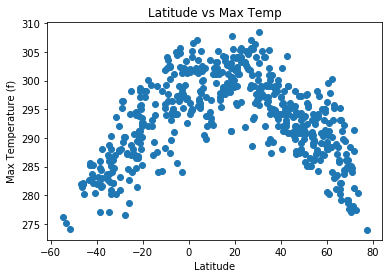

In [109]:
plt.scatter(extract_data['Lat'],extract_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title("Latitude vs Max Temp")

plt.show()

## Latitude vs. Humidity Plot

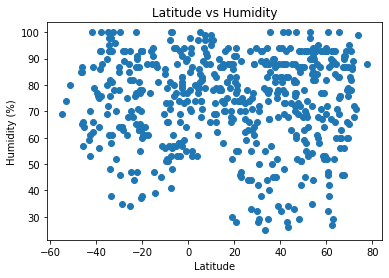

In [110]:
plt.scatter(extract_data['Lat'],extract_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

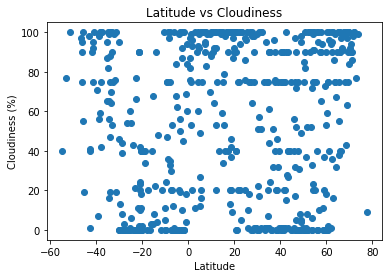

In [111]:
plt.scatter(extract_data['Lat'],extract_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

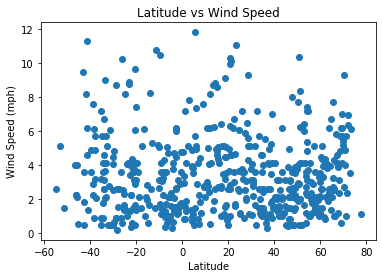

In [112]:
plt.scatter(extract_data['Lat'],extract_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression